# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## Odalys Barrionuevo
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### <span style="color:green"> Commento: </span>
<span style="color:green"> Le correzioni all'energia potenziale e pressione vengono introdotte perchè oltre il raggio di cut off le interazione vengono considerate nulle, per tenere in considerazione le interazione da $r_{cut}$ a $+\infty$ vengono aggiunte le seguenti quantità: </span>

<span style="color:green"> $$vtail = \frac{8\pi\rho}{9r_c^9}-\frac{8\pi\rho}{3r_c^3},$$ </span>

<span style="color:green"> $$ptail = 32\pi\rho(\frac{1}{9r_c^9}-\frac{1}{6r_c^3}).$$ </span>

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

### <span style="color:green"> Commento: </span>
<span style="color:green"> In questa esercitazione viene eseguita una simulazione di un sistema canonico (NVT) di 108 particelle in cui viene sfruttato l'algoritmo di Metropolis. Sotto vengono riporati i grafici dell'equilibrazione e delle medie istantanee dell'energia potenziale per particella (U/N) per ogni stato del sistema (solido, liquido e gassoso). Per quanto riguarda l'equilibrazione possiamo dire che dopo 200 passsi Metropolis il sistema è in equilibrio.</span>

<span style="color:green"> Per ottenere un'accettazione approssimativamente al 50% è stato usato un delta = 0.055 per il solido, delta = 0.105 per il liquido e delta = 3.94 per il gas. Per il gas l'accettazione non scende sotto il 64%. </span>

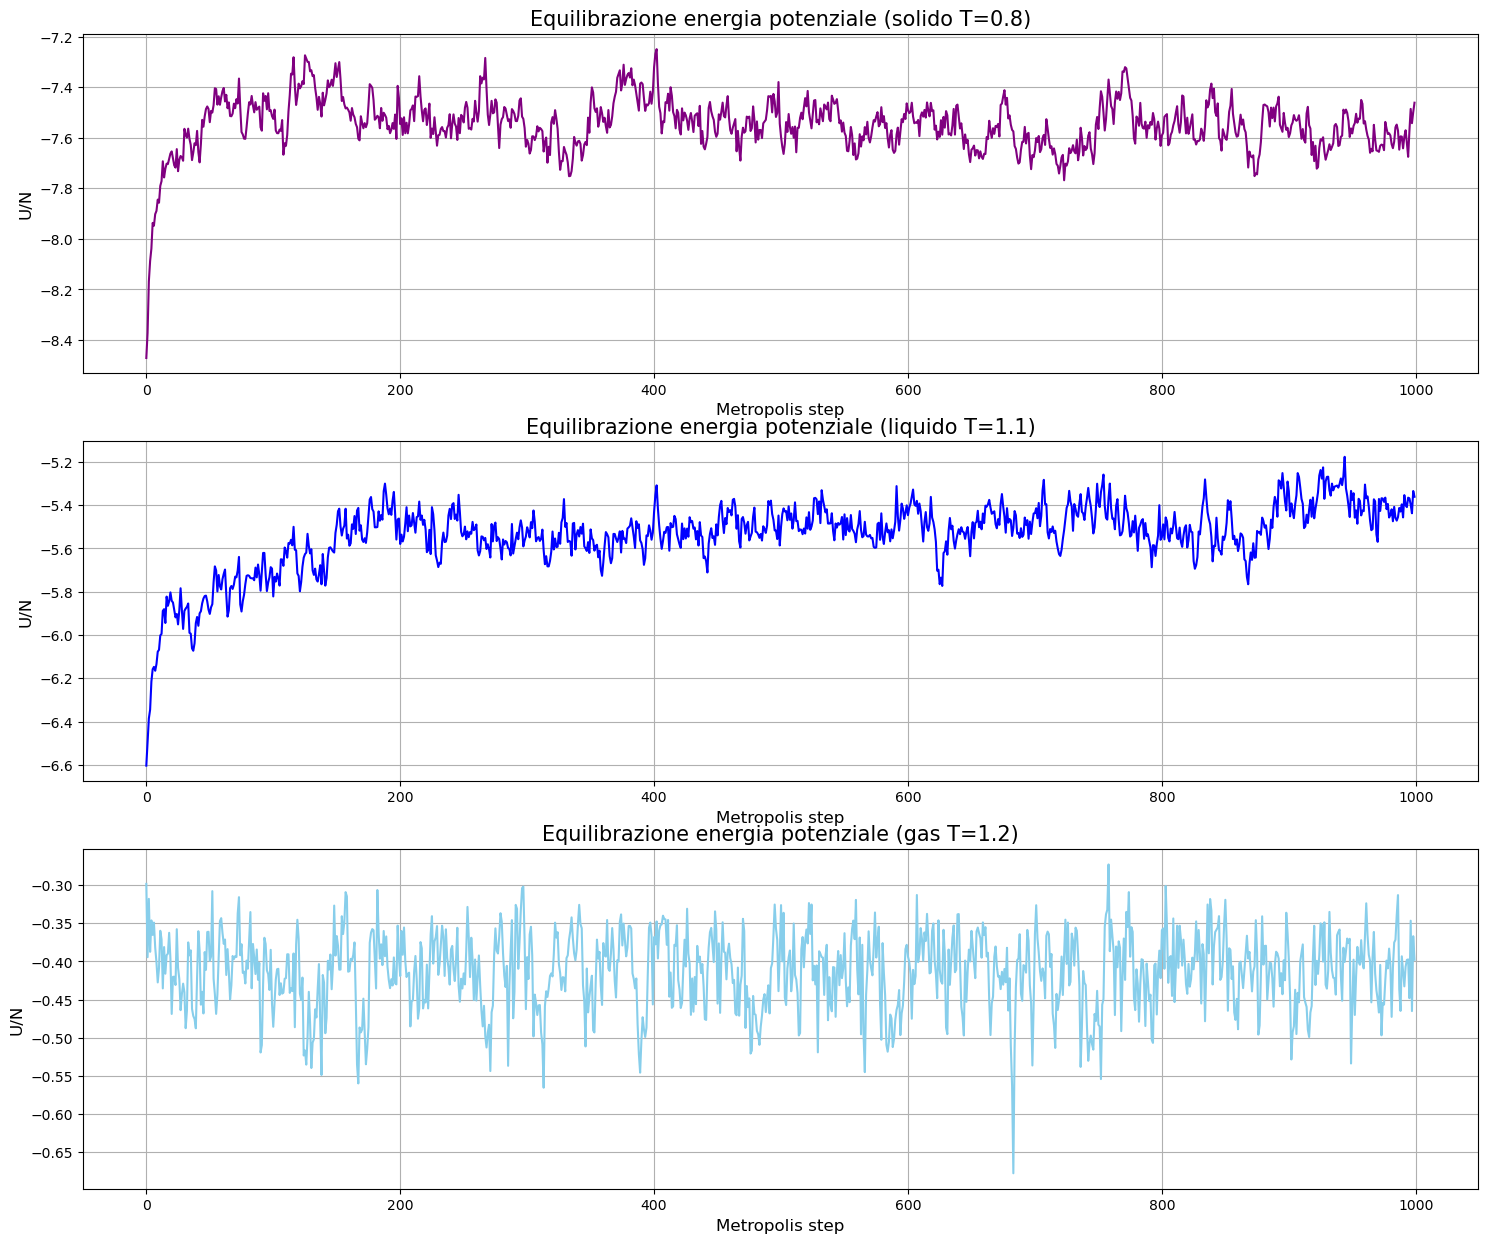

In [4]:
import matplotlib #per grafici
import matplotlib.pyplot as plt
import numpy as np #per avere i vettori
import math

fig, axes = plt.subplots(3, 1, figsize=(18, 15))

M = 1000
N = 1000
L = 1
x = np.arange(N)

U_solid = np.loadtxt("potential_energyS.dat", usecols=(1), unpack='true' )
U_liquid = np.loadtxt("potential_energyL.dat", usecols=(1), unpack='true' )
U_gas = np.loadtxt("potential_energyG.dat", usecols=(1), unpack='true' )

axes[0].plot(x, U_solid, color = 'purple')
axes[0].set_title('Equilibrazione energia potenziale (solido T=0.8)', fontsize = 15)
axes[0].set_xlabel('Metropolis step', fontsize = 12)
axes[0].set_ylabel('U/N', fontsize = 12)
axes[0].grid(True)

axes[1].plot(x, U_liquid, color = 'blue')
axes[1].set_title('Equilibrazione energia potenziale (liquido T=1.1)', fontsize = 15)
axes[1].set_xlabel('Metropolis step', fontsize = 12)
axes[1].set_ylabel('U/N', fontsize = 12)
axes[1].grid(True)

axes[2].plot(x, U_gas, color = 'skyblue')
axes[2].set_title('Equilibrazione energia potenziale (gas T=1.2)', fontsize = 15)
axes[2].set_xlabel('Metropolis step', fontsize = 12)
axes[2].set_ylabel('U/N', fontsize = 12)
axes[2].grid(True)

plt.show()

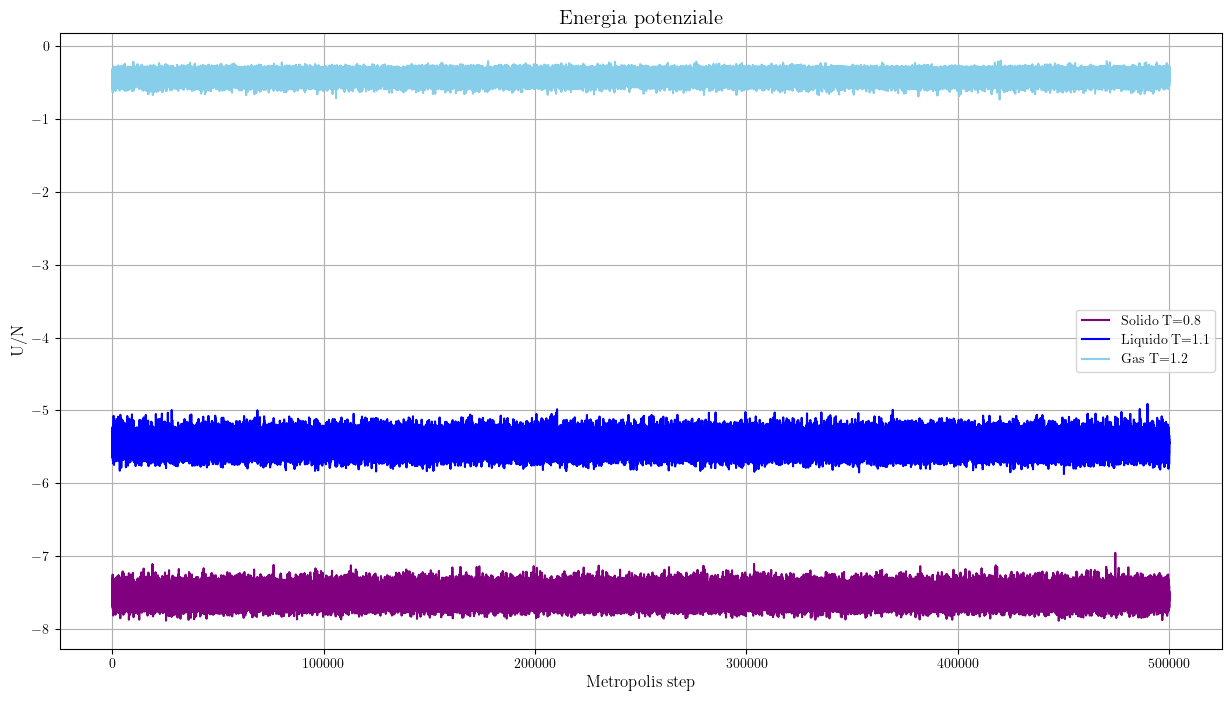

In [123]:
import matplotlib #per grafici
import matplotlib.pyplot as plt
import numpy as np #per avere i vettori
import math

plt.figure(figsize=(15, 8))

M = 500000
N = 500000
L = 1
x = np.arange(N)

UE_solid = np.loadtxt("potential_energyES.dat", usecols=(1), unpack='true' )
UE_liquid = np.loadtxt("potential_energyEL.dat", usecols=(1), unpack='true' )
UE_gas = np.loadtxt("potential_energyEG.dat", usecols=(1), unpack='true' )

plt.plot(x, UE_solid, color = 'purple', label = "Solido T=0.8")
plt.plot(x, UE_liquid, color = 'blue', label = "Liquido T=1.1")
plt.plot(x, UE_gas, color = 'skyblue', label = "Gas T=1.2")
plt.title('Energia potenziale', fontsize = 15)
plt.xlabel('Metropolis step', fontsize = 12)
plt.ylabel('U/N', fontsize = 12)
plt.legend()
plt.grid(True)

plt.show()

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### <span style="color:green"> 1) Commento : </span>
<span style="color:green"> Sotto viene riportata l'autocorrelazione di U/N del solido, liquido e gas. Si vede come alla distanza di 300 passi Metropolis la correlazione tra i dati si aggiri attorno allo zero. Perciò non essendo esattamente nulla potrebbe essere necessaria una dimensione più grande per i blocchi per evitare che le medie siano influenzate da una correlazione residue e per evitare (come si vede nel punto 2) di sottostimare l'errore. </span>

### <span style="color:green"> 2) Risposta : </span>
<span style="color:green"> Viene riportato anche un grafico dell'incertezza di U/N al variare della dimensione del blocco (L). Come si può notare, l'incertezza statistica per taglie piccole del blocco è sottostimata. 
Aumentando il numero di dati per blocco, una volta che la taglia è sufficientemente grande si ha indipendenza statistica tra le medie delle osservabili.
Dai risultati ottenuti si può notare come 1500 possa essere una buona dimensione dei blocchi per tutte e tre le fasi che corrisponde a 5 volte il valore di passi metropolis per cui non sia ha più correlazione tra i dati.</span>

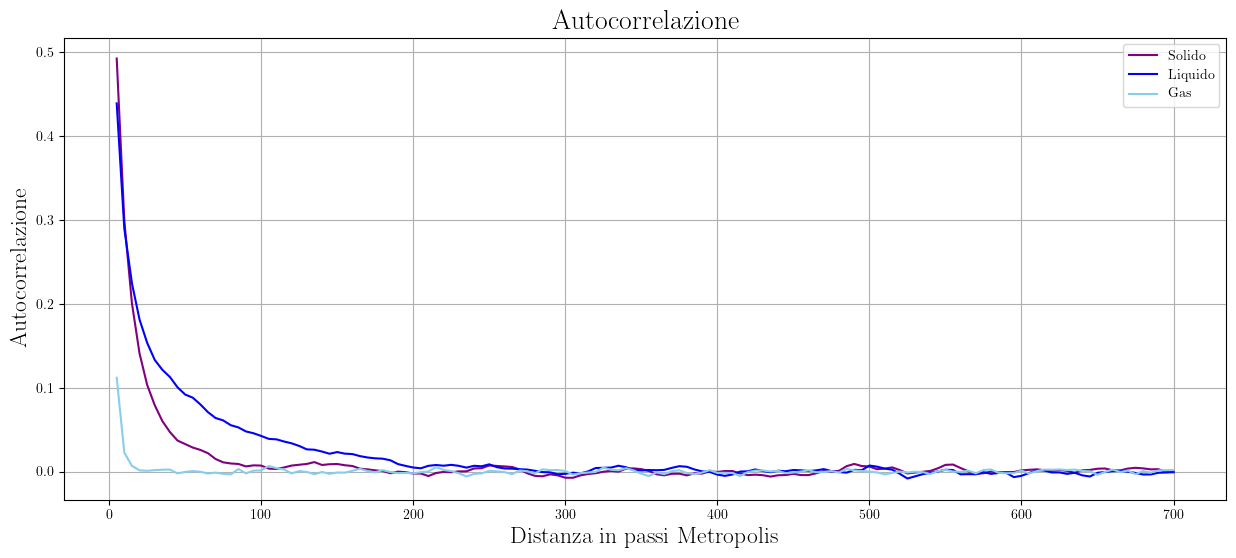

In [125]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def Ac (dati,passi):
    covarianza = np.cov(dati[:-passi], dati[passi:])
    return covarianza[0,1]/covarianza[0,0]

autocorrelazioneS = []
autocorrelazioneL = []
autocorrelazioneG = []
passi = [i for i in range (5, 701, 5)]
plt.figure(figsize=(15, 6))

for t in passi:
    autocorrelazioneS.append(Ac(UE_solid, t))
    autocorrelazioneL.append(Ac(UE_liquid, t))
    autocorrelazioneG.append(Ac(UE_gas, t))
plt.plot(passi, autocorrelazioneS, label = "Solido", color = 'purple')
plt.plot(passi, autocorrelazioneL, label = "Liquido", color = 'blue')
plt.plot(passi, autocorrelazioneG, label = "Gas", color = 'skyblue')
plt.title('Autocorrelazione', fontsize = 20)
plt.xlabel('Distanza in passi Metropolis', fontsize = 17)
plt.ylabel('Autocorrelazione', fontsize = 17)
plt.legend()
plt.grid()

plt.show()

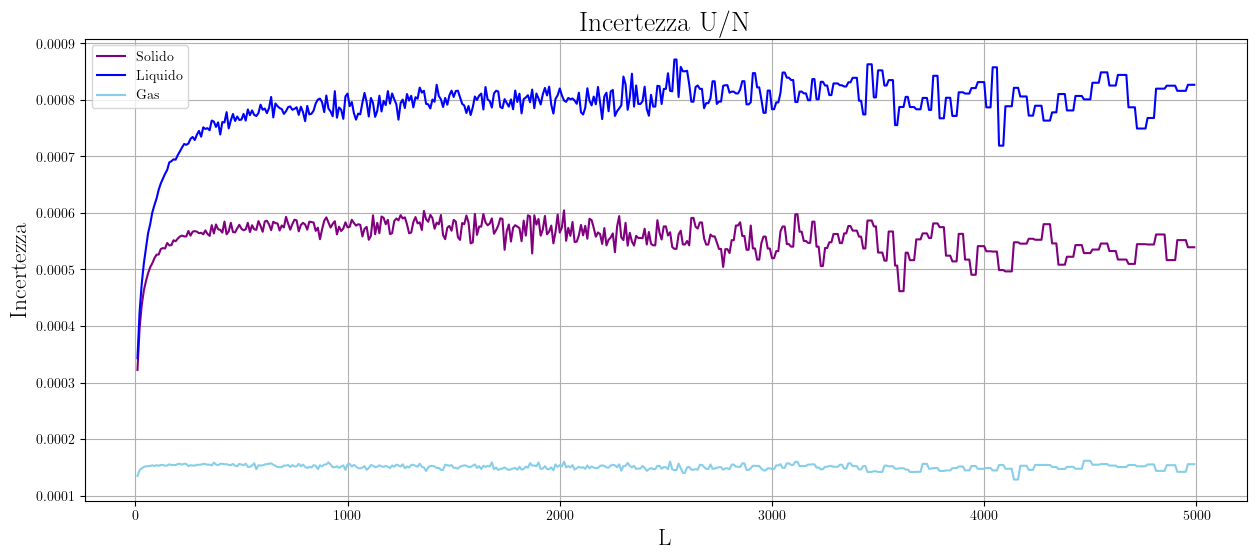

CPU times: user 1min 37s, sys: 436 ms, total: 1min 37s
Wall time: 1min 37s


In [128]:
%%time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def Incertezza(dati,N):
    L = int(len(dati)/N)
    tot=0
    tot2=0
    for i in range(N):
        sum = 0
        for j in range(L):
            sum += dati[j+i*L]
        sum/=L 
        tot += sum
        tot2 += (sum)**2 

    tot/=N # Cumulative average
    tot2/=N # Cumulative square average
    err = math.sqrt((tot2-tot**2)/N) # Statistical uncertainty
    return err

plt.figure(figsize=(15, 6))
M = 500000
x = []
errS = []
errL = []
errG = []

for L in range(10, 5000, 10):
    N = int(M/L)
    x.append(L)
    errS.append(Incertezza(UE_solid, N))
    errL.append(Incertezza(UE_liquid, N))
    errG.append(Incertezza(UE_gas, N))
plt.plot(x, errS, label = "Solido", color = 'purple')
plt.plot(x, errL, label = "Liquido", color = 'blue')
plt.plot(x, errG, label = "Gas", color = 'skyblue')
plt.title("Incertezza U/N", fontsize = 20)
plt.ylabel("Incertezza", fontsize = 17)
plt.xlabel("L", fontsize = 17)
plt.legend()
plt.grid()

plt.show()
    

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### <span style="color:green"> Commento : </span>
<span style="color:green"> Per il calcolo della distribuzione radiale viene sfruttato il calcolo della distanza tra le particelle. Se la distanza è inferiore a metà cella allora viene aggiunto +2 al bin corrispondente dell'istogramma. Infine questo viene normalizzato con la quantità:</span>
<span style="color:green"> $$\rho N \Delta V(r)$$ con $$\Delta V(r) = \frac{4\pi}{3} \left[ (r+dr)^3 -r^3 \right]. $$</span>

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

### <span style="color:green"> Commento : </span>
<span style="color:green"> Dopo aver equilibrato, sotto vengono riportati i grafici di $U/N$, $P$ e $g(r)$ con i loro rispettivi errori. $U/N$e $P$ sono in funzione del numero di blocchi e $g(r)$ è in funzione della distanza tra due particelle.</span>

<span style="color:green">In accordo con i risultati ottenuti precedentemente, per tutte e tre le grandezze sono stati usati 20 blocchi da 2000 step l'uno in modo tale da poter lavorare con valori indipendenti tra loro. </span>

<span style="color:green">Per quanto riguarda $g(r)$, viene riportato un confronto tra dinamica molecolare e Metropolis. Possiamo notare come entrambi i tipi di sistemi (microcanonico e canonico) tendano ad assomigliarsi, soprattutto per lo stato solido e liquido (purchè sempre lontani da un punto critico). </span>

## <span style="color:green"> Solido: </span>

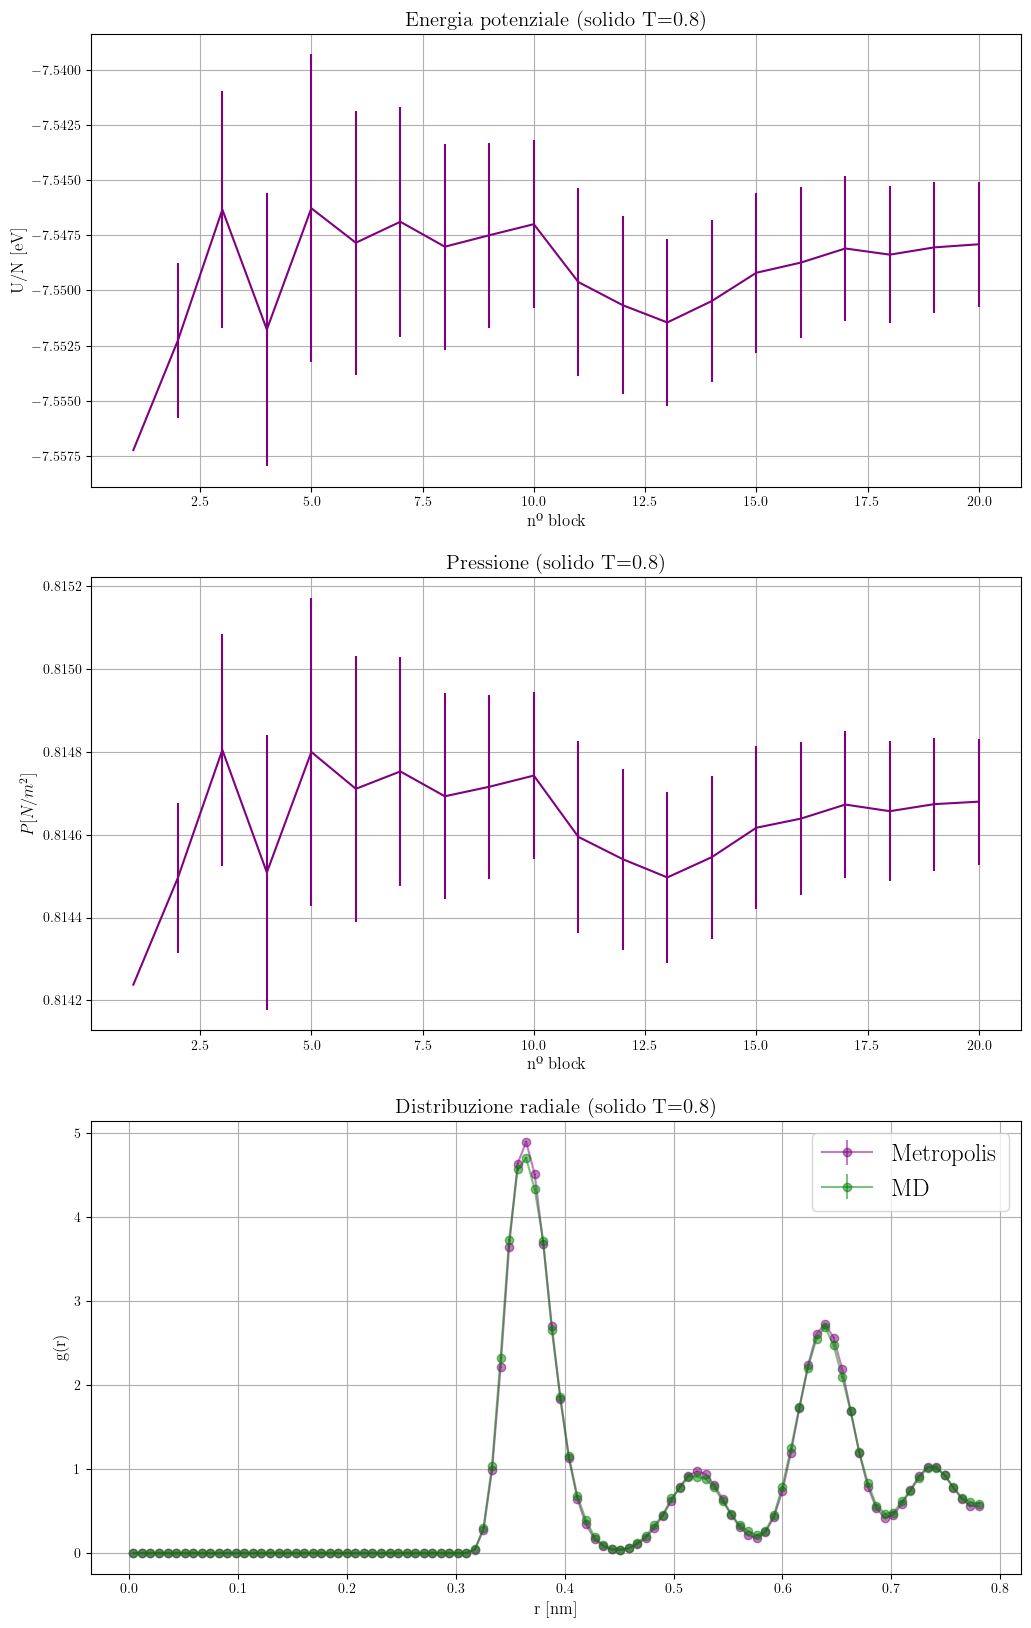

In [45]:
import matplotlib #per grafici
import matplotlib.pyplot as plt
import numpy as np #per avere i vettori
import math

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, axes = plt.subplots(3, 1, figsize=(12, 20))

M = 20000
N = 20
L = 1000
#sigma = 0.34
#epsilon = 0.0103
x = np.arange(N)+1
x_gofr = (np.arange(100)+0.5)*(108/1.1)**(1/3)/(2*100)*sigma

UE_av_solid, errUE_S = np.loadtxt("Esercizio07.4/potential_energy_solid.dat", usecols = (2, 3), unpack='true' )
P_av_solid, errP_S = np.loadtxt("Esercizio07.4/pressure_solid.dat", usecols = (2, 3), unpack='true' )
Gofr_solid, err_Metro_S = np.loadtxt("Esercizio07.4/gofr_metro_solid.dat", usecols = (1, 2), unpack='true' )
Gofr_MD_solid, err_MD_S = np.loadtxt("Esercizio07.4/gofr_MD_solid.dat", usecols = (1, 2), unpack='true' )

axes[0].errorbar(x, UE_av_solid, yerr = errUE_S, color = 'purple')
axes[0].set_title('Energia potenziale (solido T=0.8)', fontsize = 15)
axes[0].set_xlabel('nº block', fontsize = 12)
axes[0].set_ylabel('U/N [eV]', fontsize = 12)
axes[0].grid(True)

axes[1].errorbar(x, P_av_solid, yerr = errP_S, color = 'purple')
axes[1].set_title('Pressione (solido T=0.8)', fontsize = 15)
axes[1].set_xlabel('nº block', fontsize = 12)
axes[1].set_ylabel('$P [{N} / {m}^2]$', fontsize = 12)
axes[1].grid(True)
                    
axes[2].errorbar(x_gofr, Gofr_solid, yerr=err_Metro_S, marker='.', markersize=12, color = 'purple', alpha=0.5, label = 'Metropolis')
axes[2].errorbar(x_gofr, Gofr_MD_solid, yerr=err_MD_S, marker='.', markersize=12, color = 'green', alpha=0.5, label = 'MD')
axes[2].set_title('Distribuzione radiale (solido T=0.8)', fontsize = 15)
axes[2].set_xlabel('r [nm]', fontsize = 12)
axes[2].set_ylabel('g(r) ', fontsize = 12)
axes[2].legend(fontsize=18)
axes[2].grid(True)
                        
plt.show()

## <span style="color:green"> Liquido: </span>

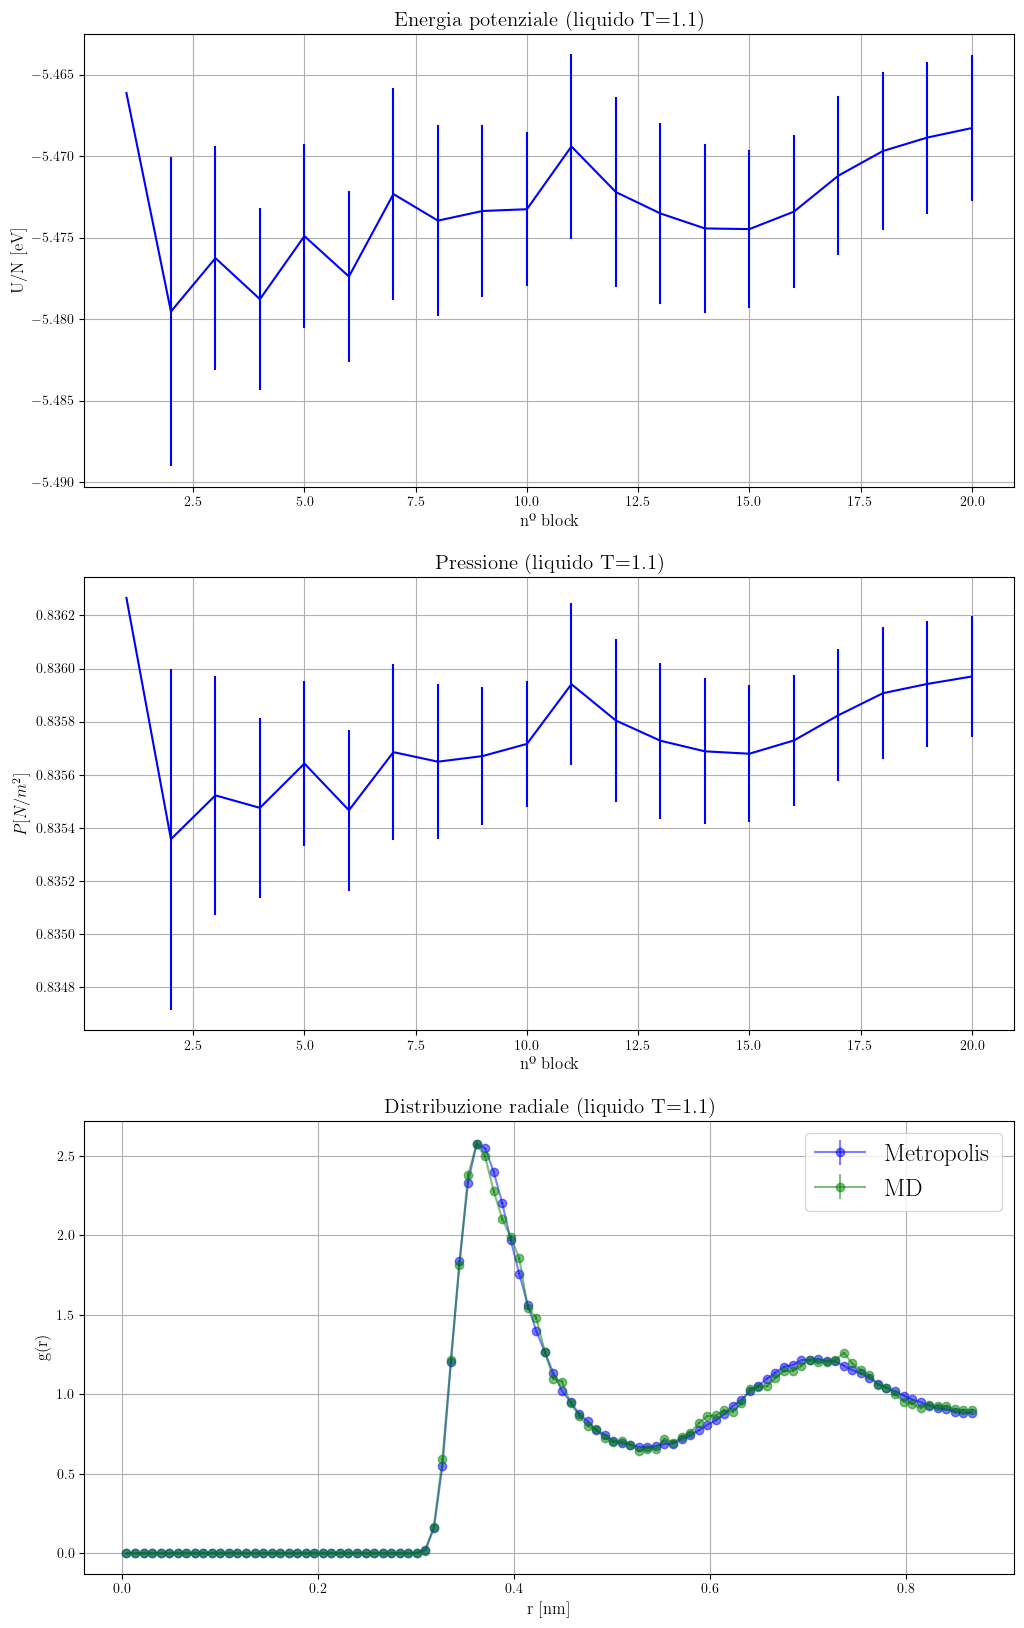

In [51]:
import matplotlib #per grafici
import matplotlib.pyplot as plt
import numpy as np #per avere i vettori
import math

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

fig, axes = plt.subplots(3, 1, figsize=(12, 20))

M = 20000
N = 20
L = 1000
sigma = 0.34
epsilon = 0.0103
x = np.arange(N)+1
x_gofr = (np.arange(100)+0.5)*(108/0.8)**(1/3)/(2*100)*sigma

UE_av_liquid, errUE_L = np.loadtxt("Esercizio07.4/potential_energy_liquid.dat", usecols = (2, 3), unpack='true' )
P_av_liquid, errP_L = np.loadtxt("Esercizio07.4/pressure_liquid.dat", usecols = (2, 3), unpack='true' )
Gofr_liquid, err_Metro_L = np.loadtxt("Esercizio07.4/gofr_metro_liquid.dat", usecols = (1, 2), unpack='true' )
Gofr_MD_liquid, err_MD_L = np.loadtxt("Esercizio07.4/gofr_MD_liquid.dat", usecols = (1, 2), unpack='true' )

axes[0].errorbar(x, UE_av_liquid, yerr = errUE_L, color = 'blue')
axes[0].set_title('Energia potenziale (liquido T=1.1)', fontsize = 15)
axes[0].set_xlabel('nº block', fontsize = 12)
axes[0].set_ylabel('U/N [eV]', fontsize = 12)
axes[0].grid(True)

axes[1].errorbar(x, P_av_liquid, yerr = errP_L, color = 'blue')
axes[1].set_title('Pressione (liquido T=1.1)', fontsize = 15)
axes[1].set_xlabel('nº block', fontsize = 12)
axes[1].set_ylabel('$P [{N} / {m}^2]$', fontsize = 12)
axes[1].grid(True)
                    
axes[2].errorbar(x_gofr, Gofr_liquid, yerr=err_Metro_L, marker='.', markersize=12, color = 'blue', alpha=0.5, label = 'Metropolis')
axes[2].errorbar(x_gofr, Gofr_MD_liquid, yerr=err_MD_L, marker='.', markersize=12, color = 'green', alpha=0.5, label = 'MD')
axes[2].set_title('Distribuzione radiale (liquido T=1.1)', fontsize = 15)
axes[2].set_xlabel('r [nm]', fontsize = 12)
axes[2].set_ylabel('g(r) ', fontsize = 12)
axes[2].legend(fontsize=18)
axes[2].grid(True)
                        
plt.show()

## <span style="color:green"> Gas: </span>

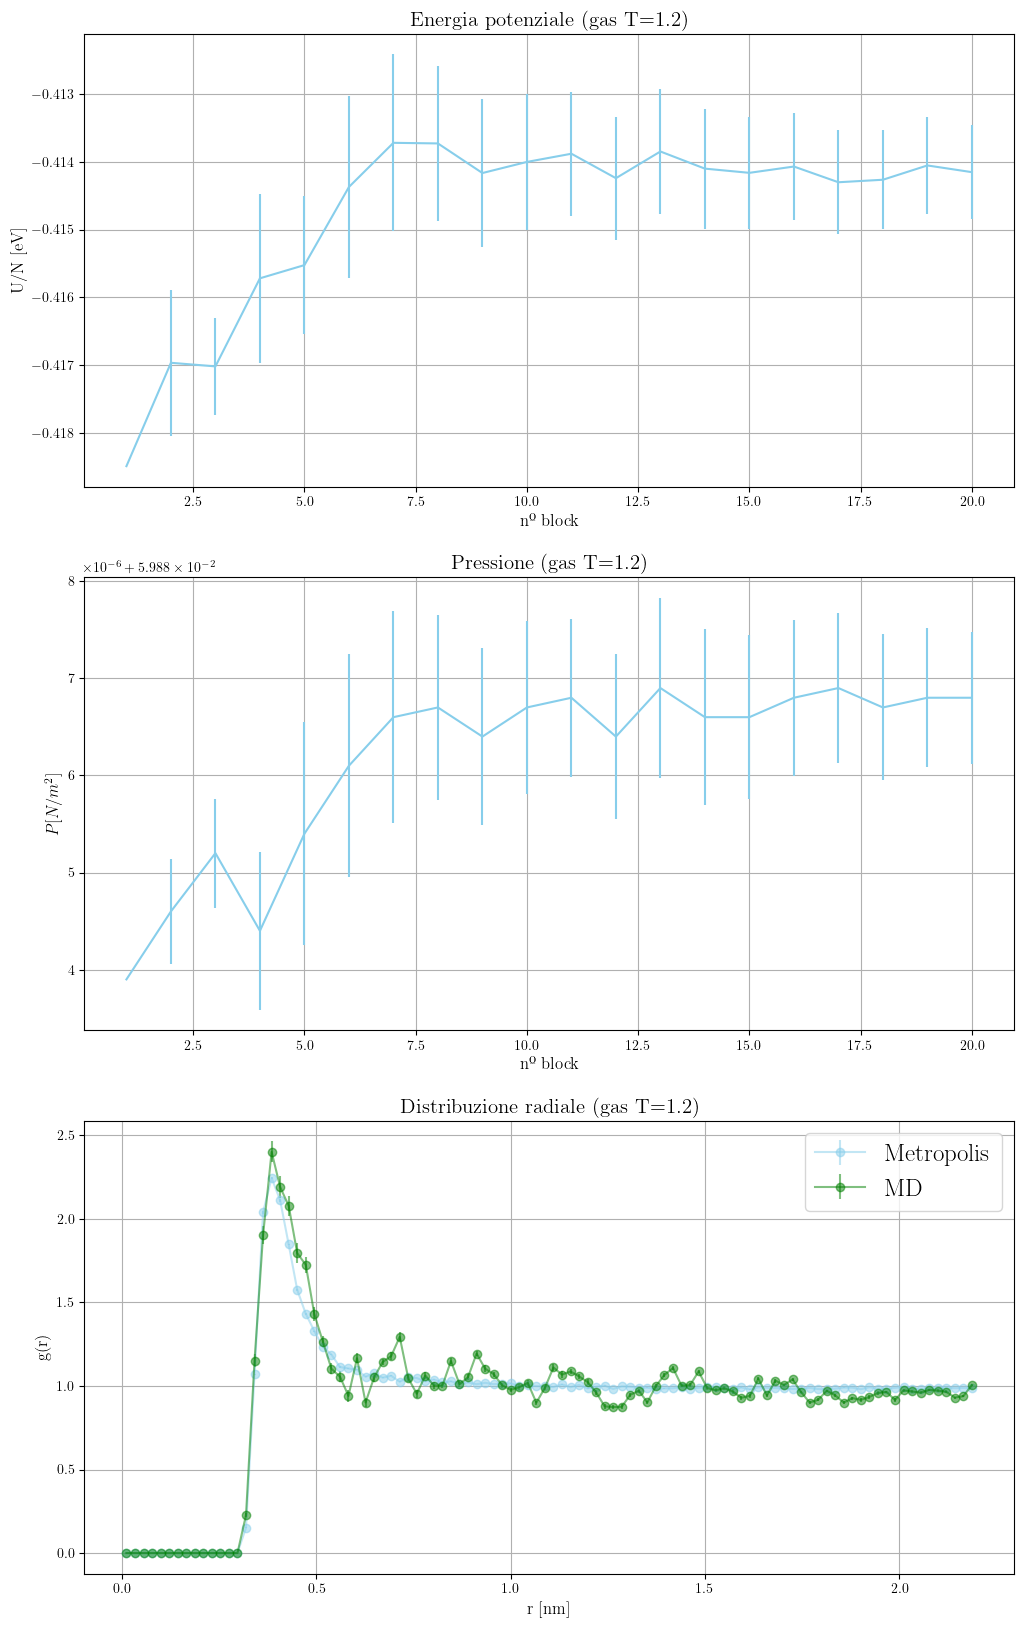

In [55]:
import matplotlib #per grafici
import matplotlib.pyplot as plt
import numpy as np #per avere i vettori
import math

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

fig, axes = plt.subplots(3, 1, figsize=(12, 20))

M = 20000
N = 20
L = 1000
sigma = 0.34
epsilon = 0.0103
x = np.arange(N)+1
x_gofr = (np.arange(100)+0.5)*(108/0.05)**(1/3)/(2*100)*sigma

UE_av_gas, errUE_G = np.loadtxt("Esercizio07.4/potential_energy_gas.dat", usecols = (2, 3), unpack='true' )
P_av_gas, errP_G = np.loadtxt("Esercizio07.4/pressure_gas.dat", usecols = (2, 3), unpack='true' )
Gofr_gas, err_Metro_G = np.loadtxt("Esercizio07.4/gofr_metro_gas.dat", usecols = (1, 2), unpack='true' )
Gofr_MD_gas, err_MD_G = np.loadtxt("Esercizio07.4/gofr_MD_gas.dat", usecols = (1, 2), unpack='true' )

axes[0].errorbar(x, UE_av_gas, yerr = errUE_G, color = 'skyblue')
axes[0].set_title('Energia potenziale (gas T=1.2)', fontsize = 15)
axes[0].set_xlabel('nº block', fontsize = 12)
axes[0].set_ylabel('U/N [eV]', fontsize = 12)
axes[0].grid(True)

axes[1].errorbar(x, P_av_gas, yerr = errP_G, color = 'skyblue')
axes[1].set_title('Pressione (gas T=1.2)', fontsize = 15)
axes[1].set_xlabel('nº block', fontsize = 12)
axes[1].set_ylabel('$P [{N} / {m}^2]$', fontsize = 12)
axes[1].grid(True)
                    
axes[2].errorbar(x_gofr, Gofr_gas, yerr=err_Metro_G, marker='.', markersize=12, color = 'skyblue', alpha=0.5, label = 'Metropolis')
axes[2].errorbar(x_gofr, Gofr_MD_gas, yerr=err_MD_G, marker='.', markersize=12, color = 'green', alpha=0.5, label = 'MD')
axes[2].set_title('Distribuzione radiale (gas T=1.2)', fontsize = 15)
axes[2].set_xlabel('r [nm]', fontsize = 12)
axes[2].set_ylabel('g(r) ', fontsize = 12)
axes[2].legend(fontsize=18)
axes[2].grid(True)
                        
plt.show()